<a href="https://colab.research.google.com/github/AmyBeisel/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_AMY_BEISEL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [0]:
%matplotlib inline

In [0]:
plt.style.use('fast')

In [0]:
plt.style.available

['seaborn-darkgrid',
 '_classic_test',
 'seaborn-talk',
 'seaborn',
 'fast',
 'grayscale',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-bright',
 'tableau-colorblind10',
 'classic',
 'seaborn-colorblind',
 'ggplot',
 'seaborn-pastel',
 'bmh',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-ticks',
 'Solarize_Light2',
 'seaborn-notebook',
 'seaborn-whitegrid']

In [0]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
  df.describe()

,Survived,Pclass,Age,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251
std,0.491139,0.836854,14.492933,52.938648
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,2.000000,28.000000,15.645850
75%,1.000000,3.000000,38.000000,33.000000
max,1.000000,3.000000,80.000000,512.329200


In [0]:
df['cabin_class']=df['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


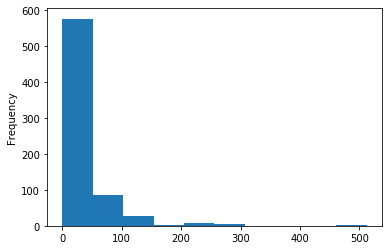

In [0]:
df['Fare'].plot(kind='hist');

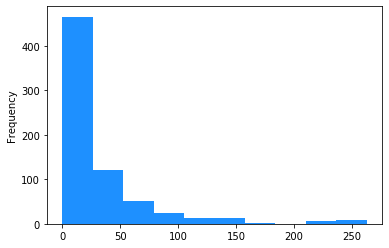

In [0]:
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color = 'dodgerblue');

In [0]:
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'med', 'high', 'vhigh']

df['fare_groups']=pd.cut(df['Fare'],
                         bins=farebins,
                         labels=farelabels)


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

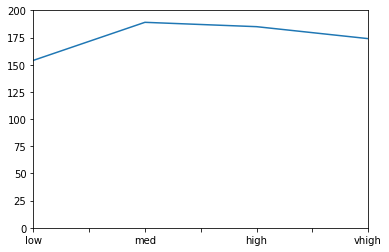

In [0]:
myresults.plot(ylim=(0,200));

In [0]:
df.shape

(709, 8)

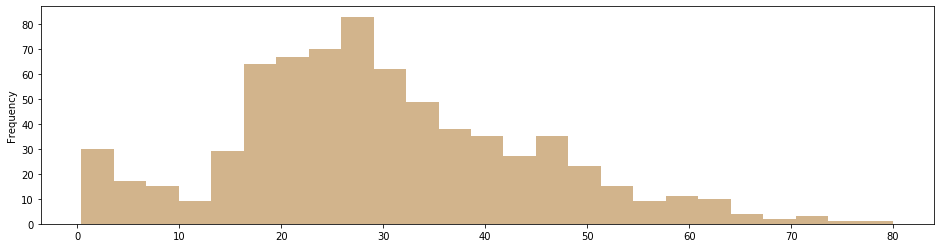

In [0]:
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan')

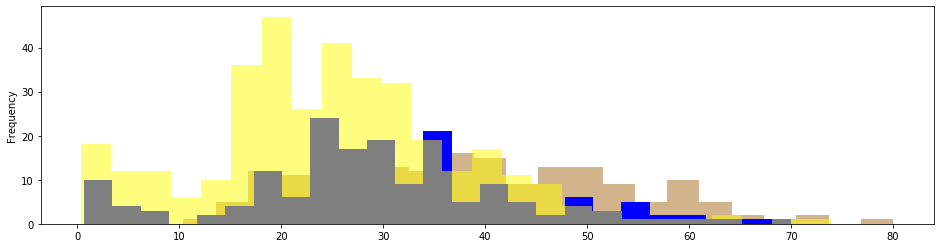

In [0]:
df[df['cabin_class']=='first'] ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan')
df[df['cabin_class']=='second'] ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='blue')
df[df['cabin_class']=='third'] ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='yellow', alpha=0.5);

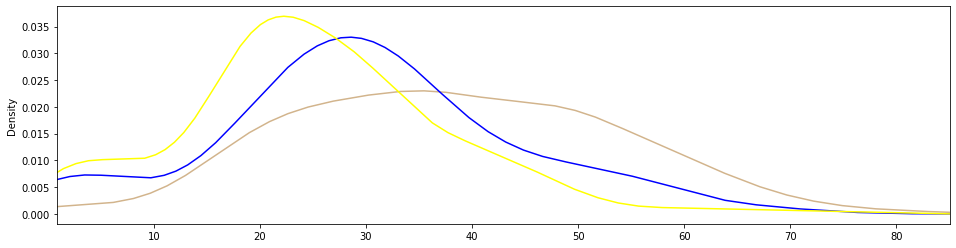

In [0]:
df[df['cabin_class']=='first'] ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='tan')
df[df['cabin_class']=='second'] ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='blue')
df[df['cabin_class']=='third'] ['Age'].plot(kind='density', xlim=(0.85), figsize=(16,4), color='yellow');

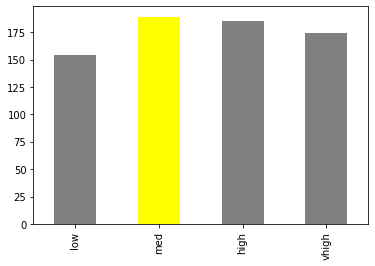

In [0]:
myresults=df['fare_groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['grey', 'yellow', 'grey', 'grey'])

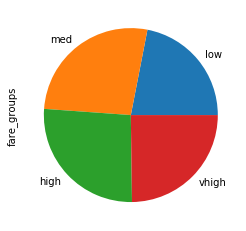

In [0]:
myresults.plot(kind='pie')

In [0]:
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


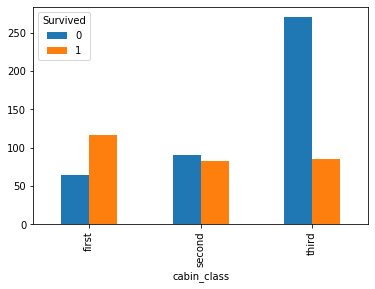

In [0]:
cab_death.plot(kind='bar')

In [0]:
cab_death1= pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


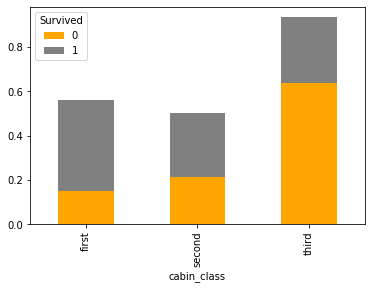

In [0]:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'grey']);

In [0]:
cab_death2=pd.crosstab(df["cabin_class"], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


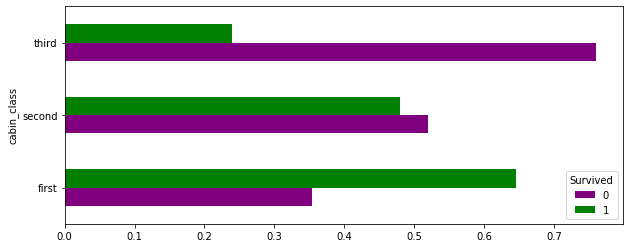

In [0]:
cab_death2.plot(kind='barh', figsize=(10,4), color=['purple', 'green'])

In [0]:
df['Age'].mean()

29.618011283497882

In [0]:
cab_age=df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

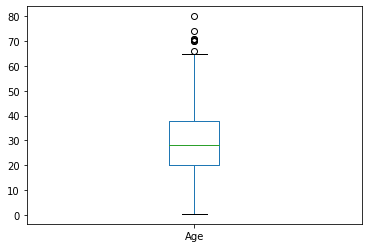

In [0]:
df['Age'].plot(kind='box')

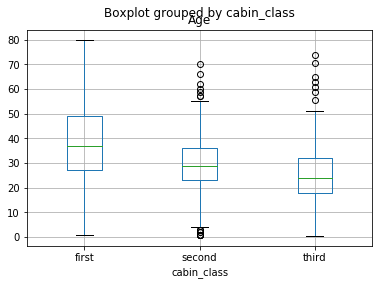

In [0]:
df.boxplot(column='Age', by='cabin_class')

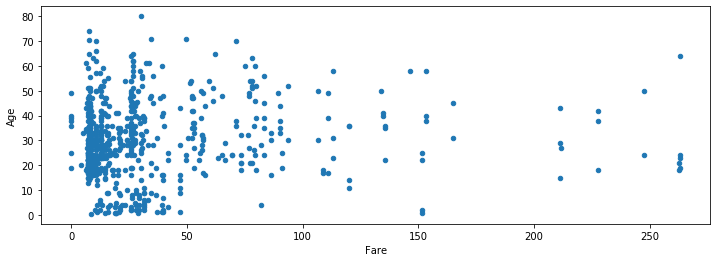

In [0]:
df.plot(kind='scatter', x = 'Fare', y='Age', figsize=(12,4))

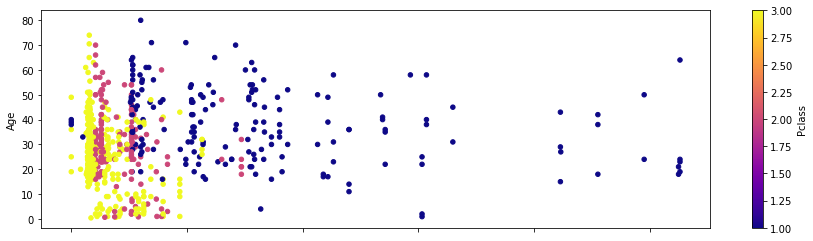

In [0]:
df.plot(kind='scatter', x="Fare", y='Age', c='Pclass', colormap='plasma', figsize=(15,4))

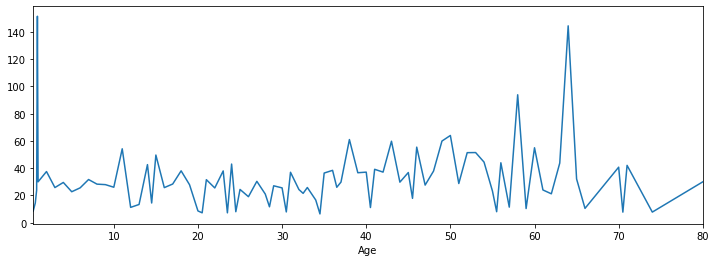

In [0]:
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4), kind='line')

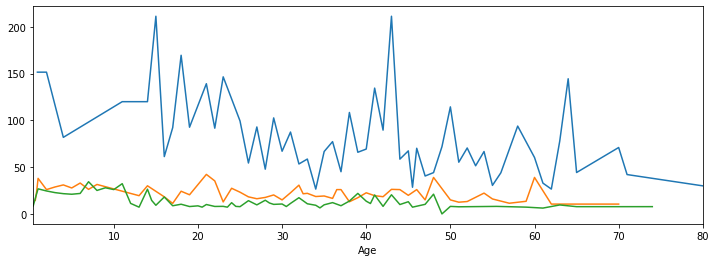

In [0]:
mycolors=['crimson', 'purple', 'dodgerblue']
df[df['cabin_class']=='first'].groupby('Age')['Fare'].mean().plot(figsize=(12,4))
df[df['cabin_class']=='second'].groupby('Age')['Fare'].mean().plot(figsize=(12,4))
df[df['cabin_class']=='third'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

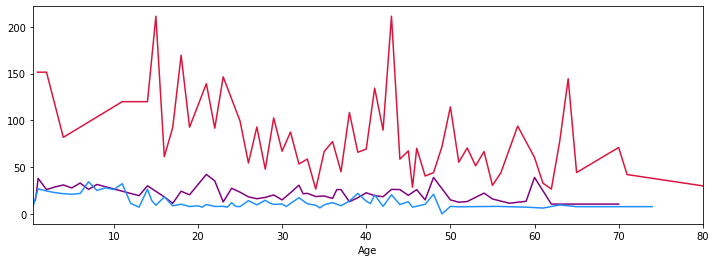

In [0]:
mycolors=['crimson', 'purple', 'dodgerblue']
cab_classes = ['first', 'second', 'third' ]

for x in [0,1,2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x])

In [0]:
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


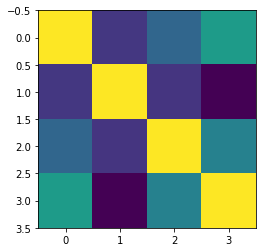

In [0]:
plt.imshow(corr_matrix)

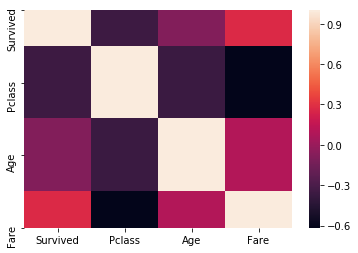

In [0]:
sns.heatmap(corr_matrix);

In [0]:
x=np.linspace(0,5,11)
y = x **2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

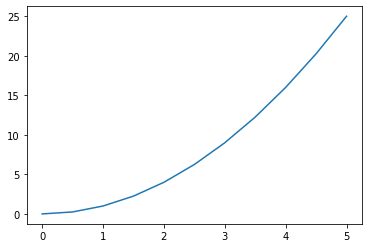

In [0]:
plt.plot(x,y);

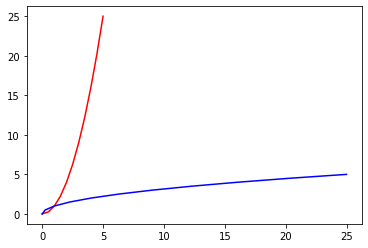

In [0]:
plt.plot(x, y, 'r');
plt.plot(y, x, 'b');

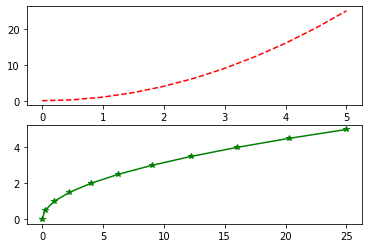

In [0]:
plt.subplot (2,1,1)
plt.plot(x, y, 'r--')
plt.subplot(2,1,2)
plt.plot(y,x, 'g*-')

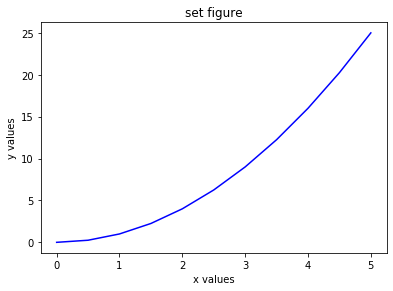

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y,'b')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('set figure');


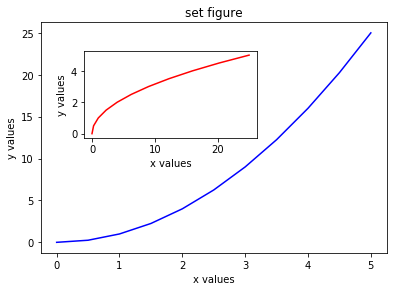

In [0]:

fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x,y,'b')
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('set figure');

axes2.plot(y, x, 'r')
axes2.set_xlabel('x values')
axes2.set_ylabel('y values');


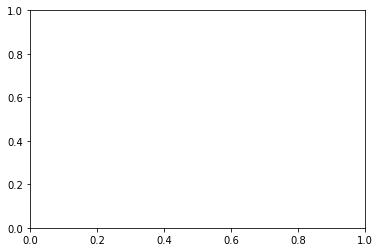

In [0]:
fig, ax = plt.subplots()


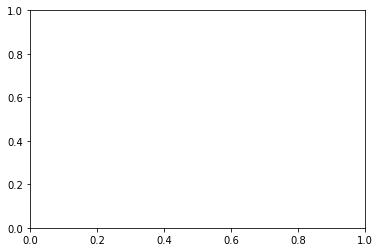

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

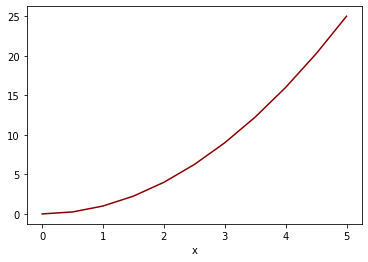

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x, y, 'darkred')
axes.set_xlabel('x');

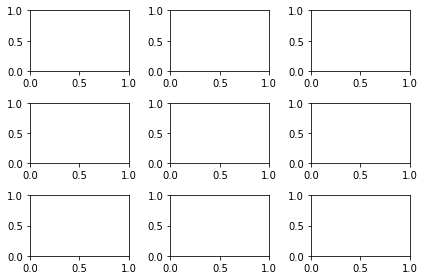

In [0]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

In [0]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62c7940898>,
      dtype=object)

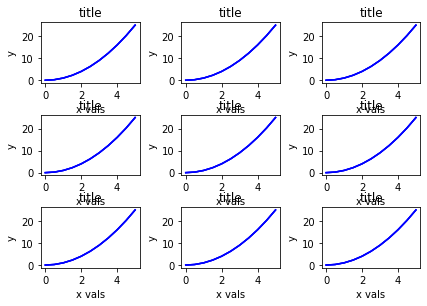

In [0]:
for a in axes:
  for ax in a:
    ax.plot(x,y,'b')
    ax.set_xlabel('x vals')
    ax.set_ylabel('y')
    ax.set_title('title')

fig

In [0]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

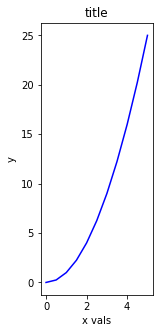

In [0]:
fig, axes = plt.subplots(figsize = (2,5))
axes.plot(x,y,'b')
axes.set_xlabel('x vals')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
fig.savefig('myfile.png')

In [0]:
axes.set_title('title')

Text(0.5, 1, 'title')

In [0]:
axes.set_xlabel('values')

Text(0.5, 24.0, 'values')

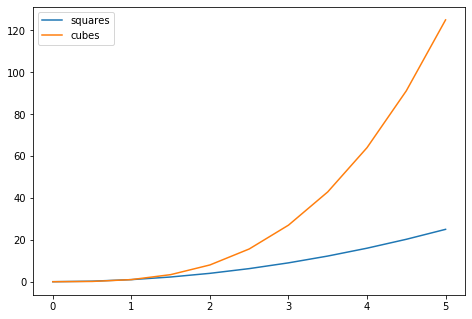

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label='squares')
ax.plot(x, x**3, label='cubes')
ax.legend();

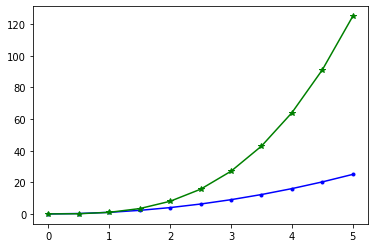

In [0]:
fig, ax = plt.subplots()
ax.plot(x,x**2, 'b.-')
ax.plot(x, x**3, 'g*-')

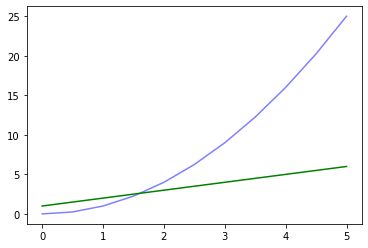

In [0]:
fig, ax = plt.subplots()

ax.plot(x,x**2, color = "blue", alpha = 0.5)
ax.plot(x,x+1, color = "green")

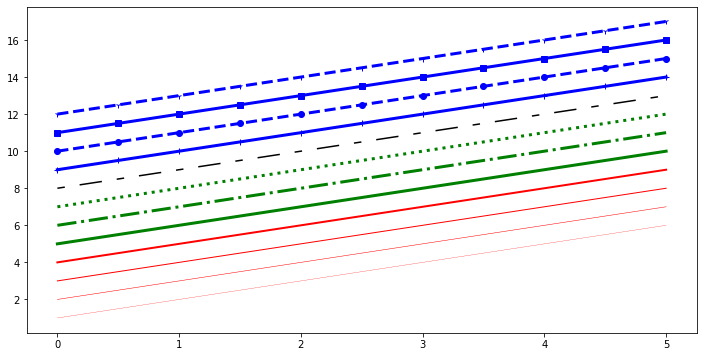

In [0]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])

ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

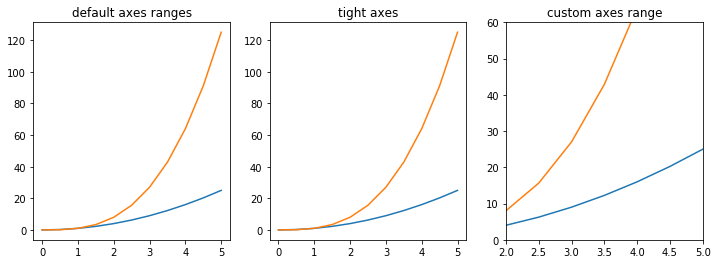

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'
df= pd.read_csv(url)
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [0]:
df.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,3.2,3.0,0.6,4.0,8.3,13.0,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,0.4,66.0,1.8,2.0,0.4,3.5,5.9,22.0,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,0.1,280.0,0.6,3.0,0.3,10.0,4.2,12.0,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [0]:
df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [0]:
drugs = ['age','marijuana-use', 'pain-releiver-use', 'tranquilizer-use',
         'cocaine-use', 'crack-use', 'oxycontin-use', 'stimulant-use',
         'hallucinogen-use', 'sedative-use', 'inhalant-use', 'meth-use',
         'heroin-use', 
         ]
drugs

['age',
 'marijuana-use',
 'pain-releiver-use',
 'tranquilizer-use',
 'cocaine-use',
 'crack-use',
 'oxycontin-use',
 'stimulant-use',
 'hallucinogen-use',
 'sedative-use',
 'inhalant-use',
 'meth-use',
 'heroin-use']

In [0]:
df = df[drugs]
df.tail()

,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
12,26-29,20.8,8.3,4.2,3.2,0.4,1.2,2.3,3.2,0.4,0.6,0.6,0.6
13,30-34,16.4,5.9,3.6,2.1,0.5,0.9,1.4,1.8,0.4,0.4,0.4,0.4
14,35-49,10.4,4.2,1.9,1.5,0.5,0.3,0.6,0.6,0.3,0.3,0.2,0.1
15,50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1
16,65+,1.2,0.6,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


In [0]:
condition=df['age'] =='50-64'
df[condition]

,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
15,50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


KeyError: ignored

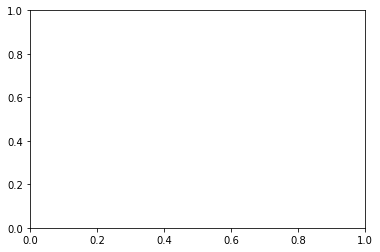

In [22]:
fig, ax = plt.subplots()
fig.patch.set(facecolor = 'white')
ax.barh(height = df['drugs'], width=0.9, color='Red')
ax.set(facecolor = 'white')
ax.set_title("'Percent of Americans aged 50-54 who said in a 2012 survey that they had used the following drugs in the past year'",
  fontsize=20,
  x=.35,
  y=1.1,
  fontweight ='bold');

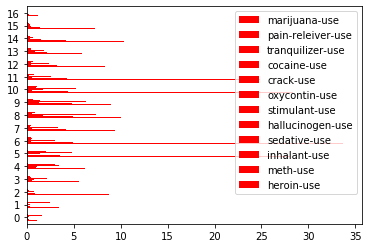

In [26]:
# More Work Here   bins=25, figsize=(16,4), color='tan')
df=df[drugs]
df.plot(kind='barh',  color='red');